In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Dataset (2).csv")
df.head()

,Year,Cyclonic Disturbances - BOB,Cyclonic Disturbances - AS,Cyclonic Disturbances - LAND,Cyclonic Disturbances - TOTAL,Cyclones - BOB,Cyclones - AS,Cyclones - LAND,Cyclones - TOTAL,Severe Cyclones - BOB,Severe Cyclones - AS,Severe Cyclones - LAND,Severe Cyclones - TOTAL
0,1891,9,1,3,13,2,1,1,4,1,1,1,3
1,1892,8,2,2,12,5,1,0,6,1,1,0,2
2,1893,10,1,1,12,9,1,0,10,3,1,0,4
3,1894,8,1,3,12,5,1,0,6,0,0,0,0
4,1895,10,1,0,11,4,1,0,5,4,0,0,4


In [ ]:
# Seperate required columns
Year = df['Year']
Cyclonic_dist = df['Cyclonic Disturbances - TOTAL']

The Dataset has 129 data points or rows

##**Performing Hypothesis Testing**

In [ ]:
# Mean of the Population
mean_pop = np.mean(Cyclonic_dist)
mean_pop

12.310077519379846

**Formulating the Hypothesis**

**Null hypothesis h0** = The mean number of cyclonic distributions is 12

**Alternate hypothesis h1** = The mean number of cyclonic distributions is greater than 12

In [ ]:
# Selecting more than 30 sample data points
sample_data = Cyclonic_dist[0:60]

In [ ]:
#sample mean
sample_mean = np.mean(sample_data)
std_dev = np.std(Cyclonic_dist)    #population standard deviation
sample_size = len(sample_data)
alpha = 0.05
Z_value=1.645

In [ ]:
print(sample_mean, std_dev, sample_size)

12.85 3.6531783965598397 60


In [ ]:
Z = (sample_mean-mean_pop)/(std_dev/np.sqrt(sample_size))
Z

1.1448172241760934

In [ ]:
# Calculating p value
p_value = 1-stats.norm.cdf(Z)
p_value

0.12614243940164171

In [ ]:
if Z_value<  alpha:
    print("Reject Null Hypothesis")
    print("Accept Alternate Hypothesis")
else:
  print("Accept Null Hypothesis")
  print("Reject Alternate Hypothesis")

Accept Null Hypothesis
Reject Alternate Hypothesis


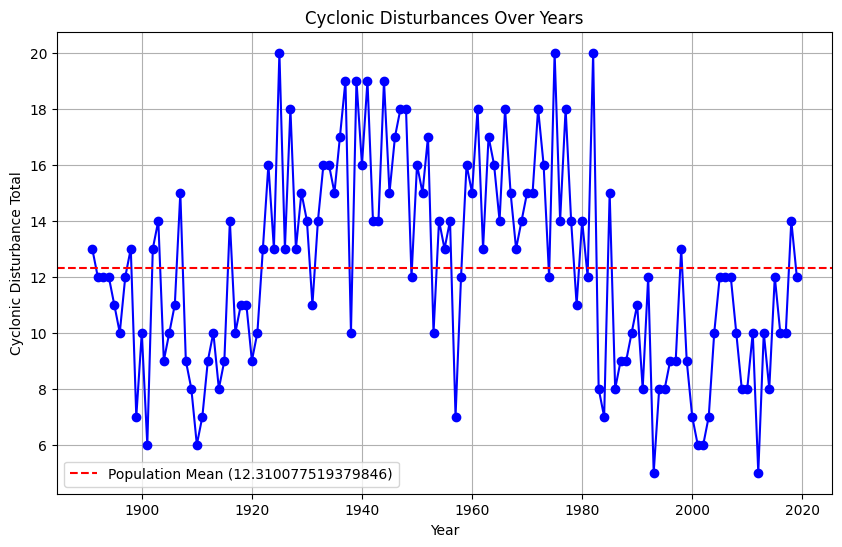

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Year, Cyclonic_dist, marker='o', linestyle='-', color='b')
plt.axhline(y=mean_pop, color='r', linestyle='--', label=f'Population Mean ({mean_pop})')
plt.xlabel('Year')
plt.ylabel('Cyclonic Disturbance Total')
plt.title('Cyclonic Disturbances Over Years')
plt.legend()
plt.grid(True)
plt.show()

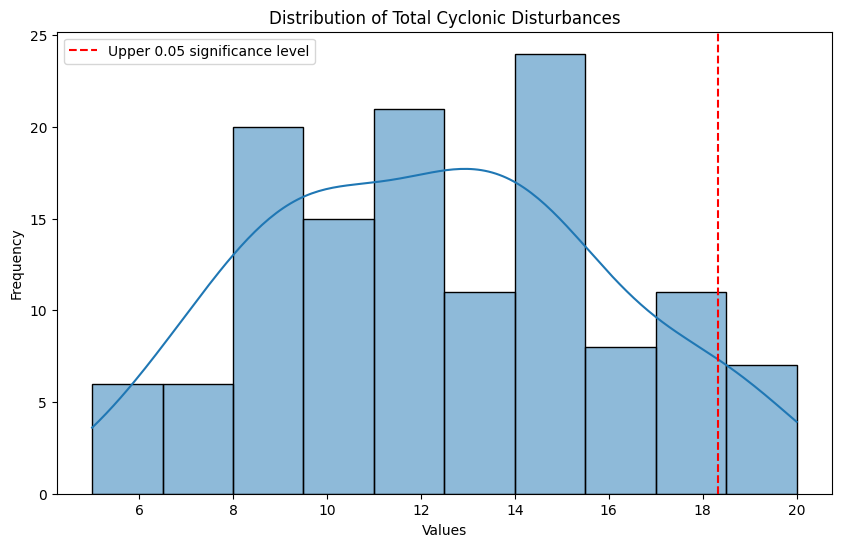

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(Cyclonic_dist, kde=True, bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Total Cyclonic Disturbances')

lower_threshold = mean_pop - Z_value * std_dev
upper_threshold = mean_pop + Z_value * std_dev
plt.axvline(x=upper_threshold, color='red', linestyle='--', label='Upper 0.05 significance level')

plt.legend()
plt.show()